In [1]:
# imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset
df = pd.read_csv("..\data\energy_dataset.csv")
df_weather = pd.read_csv("..\data\weather_features.csv")
df_weather = df_weather[df_weather["city_name"] == "Valencia"]
df_weather.drop(columns=["city_name"], inplace=True)
df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\erikl\AppData\Local\Temp\ipykernel_4676\189804039.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\energy_dataset.csv")
C:\Users\erikl\AppData\Local\Temp\ipykernel_4676\189804039.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_weather = pd.read_csv("..\data\weather_features.csv")


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [ ]:
df["generation_other"] = (
    df["generation biomass"]
    + df["generation geothermal"]
    + df["generation waste"]
    + df.get("generation other", 0)  # in case there's an existing "other" column
)

df["generation_coal"] = (
    df["generation fossil brown coal/lignite"]
    + df["generation fossil hard coal"]
    + df["generation fossil coal-derived gas"]
)

df["generation_oil"] = (
    df["generation fossil oil"]
    + df.get("generation fossil oil shale", 0)
    + df.get("generation fossil peat", 0)
)

df["generation_natural_gas"] = df["generation fossil gas"]

df["generation_solar"] = df["generation solar"]

df["forecast_solar"] = df["forecast solar day ahead"]

df["generation_wind"] = (
    df["generation wind onshore"]
    + df["generation wind offshore"]
)

df["forecast_wind"] = (
    df["forecast wind onshore day ahead"].fillna(0)
    + df["forecast wind offshore eday ahead"].fillna(0)
)

df = df[[
    "time",
    "generation_other",
    "generation_coal",
    "generation_oil",
    "generation_natural_gas",
    "generation_solar",
    "forecast_solar",
    "generation_wind",
    "forecast_wind",
    "total load forecast",
    "total load actual",
    "price day ahead",
    "price actual"
]]
df = df.rename(columns={
    "total load forecast":"total_load_forecast",
    "total load actual":"total_load_actual",
    "price day ahead":"price_day_ahead",
    "price actual":"price_actual"}
    )

df = df.copy()
df


,time,generation_other,generation_coal,generation_oil,generation_natural_gas,generation_solar,forecast_solar,generation_wind,forecast_wind,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,686.0,5150.0,162.0,4844.0,49.0,17.0,6378.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,687.0,5083.0,158.0,5196.0,50.0,16.0,5890.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,687.0,4904.0,157.0,4857.0,50.0,8.0,5461.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,672.0,4385.0,160.0,4314.0,50.0,2.0,5238.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,660.0,4027.0,156.0,4130.0,42.0,9.0,4935.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,637.0,2628.0,178.0,7634.0,85.0,96.0,3113.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,638.0,2566.0,174.0,7241.0,33.0,51.0,3288.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,639.0,2422.0,168.0,7025.0,31.0,36.0,3503.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,641.0,2293.0,163.0,6562.0,31.0,29.0,3586.0,3273.0,25450.0,25801.0,63.93,69.89


In [ ]:
# Now let's make the data into something we can make predictions on:

df["price_actual_lag1"] = df["price_actual"].shift(24)  # yesterday’s same-hour price
df["generation_wind_lag1"] = df["generation_wind"].shift(24)
df["generation_solar_lag1"] = df["generation_solar"].shift(24)

df["time"] = pd.to_datetime(df["time"], errors="coerce", utc=True)
df["hour"] = df["time"].dt.hour
df["day"] = df["time"].dt.day
df["month"] = df["time"].dt.month
df["year"] = df["time"].dt.year
df["dayofweek"] = df["time"].dt.dayofweek    # Monday = 0, Sunday = 6
df["is_weekend"] = df["dayofweek"] >= 5      # True/False


# Target = tomorrow’s actual price
df["target_price_tomorrow"] = df["price_actual"].shift(-24)

# Drop last 24 hours (no target available)
df = df.dropna(subset=["target_price_tomorrow"])

# Features (everything we would know before tomorrow)
features = [
    "forecast_solar", "forecast_wind", "total_load_forecast",
    "price_day_ahead", "price_actual_lag1", "generation_wind_lag1",
    "generation_solar_lag1", "hour", "dayofweek"
]
X = df[features]
y = df["target_price_tomorrow"]



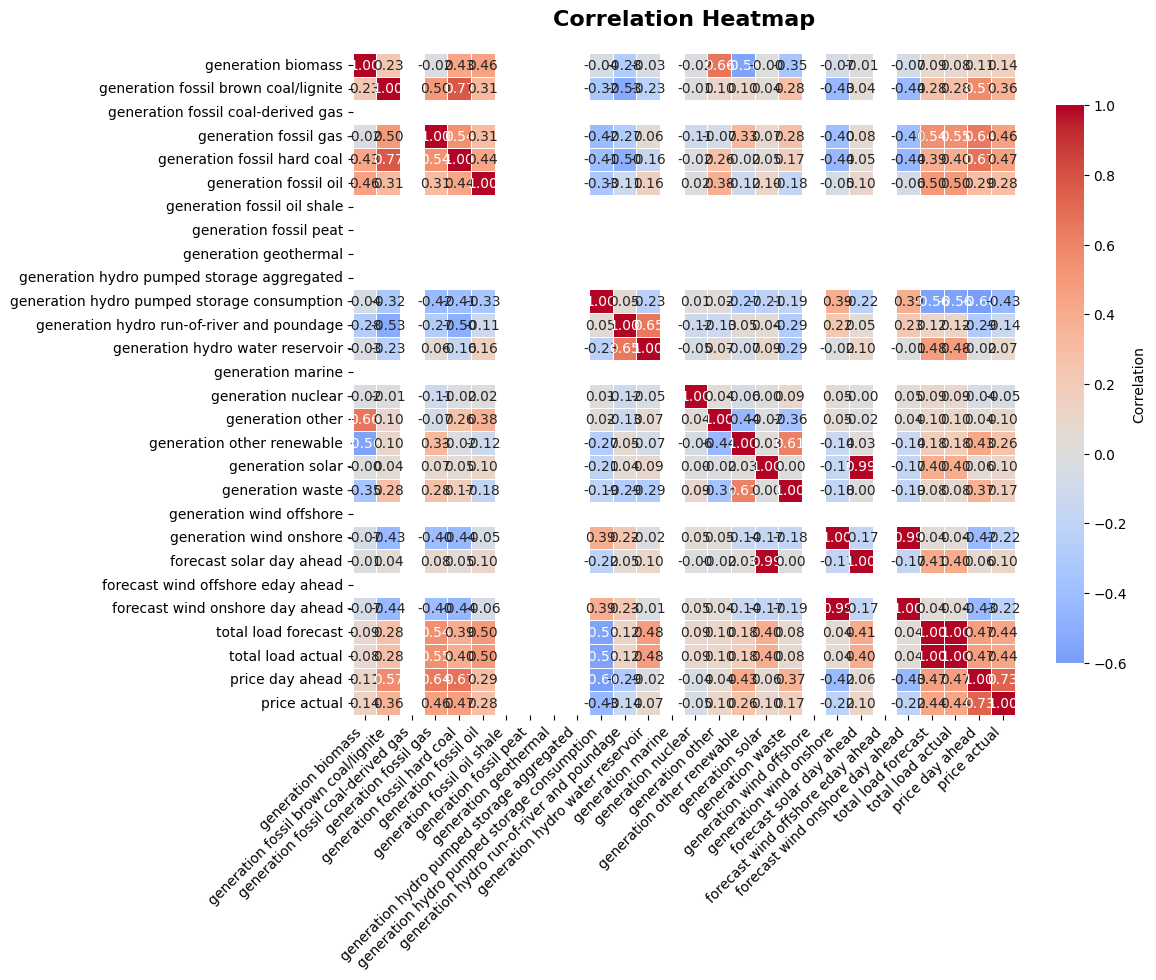

In [4]:
# Compute correlation
corr = df.corr(numeric_only=True)

# Set figure size for clarity
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    corr,
    annot=True,           # Show numbers
    fmt=".2f",            # Two decimal places
    cmap="coolwarm",      # Color palette
    center=0,             # Center around 0 correlation
    linewidths=0.5,       # Grid lines between cells
    square=True,          # Make cells square
    cbar_kws={"shrink": 0.8, "label": "Correlation"}  # Colorbar styling
)

# Improve label visibility
plt.title("Correlation Heatmap", fontsize=16, weight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()